In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
aum = pd.read_csv('aum.csv')
cust = pd.read_csv('cust.csv')
prod = pd.read_csv('prod_holding.csv')

EDA

aum table

In [3]:
aum.head()

,customer_id,amount
0,999992,6.197167e+08
1,999994,5.312117e+07
2,1000017,0.000000e+00
3,1000018,6.678269e+04
4,1000021,7.766416e+07


In [4]:
aum.shape

(113066, 2)

In [5]:
aum.dtypes

customer_id      int64
amount         float64
dtype: object

In [6]:
aum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113066 entries, 0 to 113065
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   customer_id  113066 non-null  int64  
 1   amount       113066 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 1.7 MB


In [7]:
aum.describe()

,customer_id,amount
count,1.130660e+05,1.130660e+05
mean,1.875538e+06,6.548123e+07
std,1.144470e+06,1.022876e+09
min,1.293000e+03,0.000000e+00
25%,1.132518e+06,2.386672e+04
50%,1.395648e+06,6.794894e+04
75%,2.471803e+06,1.094568e+06
max,4.701974e+06,1.325000e+11


In [8]:
aum.nunique()

customer_id    113066
amount          77568
dtype: int64

cust table

In [9]:
cust.head()

,customer_id,segment,province_city
0,1016846,Regular,HA NOI
1,1016868,Regular,HO CHI MINH
2,1016903,Regular,HO CHI MINH
3,1016936,Regular,HO CHI MINH
4,1016938,Regular,HA NOI


In [10]:
cust.shape

(113066, 3)

In [11]:
cust.dtypes

customer_id       int64
segment          object
province_city    object
dtype: object

In [12]:
cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113066 entries, 0 to 113065
Data columns (total 3 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   customer_id    113066 non-null  int64 
 1   segment        113066 non-null  object
 2   province_city  113066 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.6+ MB


In [13]:
cust.describe()

,customer_id
count,1.130660e+05
mean,1.875538e+06
std,1.144470e+06
min,1.293000e+03
25%,1.132518e+06
50%,1.395648e+06
75%,2.471803e+06
max,4.701974e+06


In [14]:
cust.nunique()

customer_id      113066
segment               3
province_city        42
dtype: int64

prod_holding table

In [15]:
prod.head()

,customer_id,prod_ca,prod_td,prod_credit_card
0,1016846,1,0,0.0
1,1016868,1,0,0.0
2,1016903,1,0,0.0
3,1016936,1,0,0.0
4,1016938,1,0,1.0


In [16]:
prod.shape

(113066, 4)

In [17]:
prod.dtypes

customer_id           int64
prod_ca               int64
prod_td               int64
prod_credit_card    float64
dtype: object

In [18]:
prod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113066 entries, 0 to 113065
Data columns (total 4 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   customer_id       113066 non-null  int64  
 1   prod_ca           113066 non-null  int64  
 2   prod_td           113066 non-null  int64  
 3   prod_credit_card  112070 non-null  float64
dtypes: float64(1), int64(3)
memory usage: 3.5 MB


In [19]:
prod.describe()

,customer_id,prod_ca,prod_td,prod_credit_card
count,1.130660e+05,113066.000000,113066.000000,112070.000000
mean,1.875538e+06,0.897334,0.121584,0.210966
std,1.144470e+06,0.303523,0.326806,0.407996
min,1.293000e+03,0.000000,0.000000,0.000000
25%,1.132518e+06,1.000000,0.000000,0.000000
50%,1.395648e+06,1.000000,0.000000,0.000000
75%,2.471803e+06,1.000000,0.000000,0.000000
max,4.701974e+06,1.000000,1.000000,1.000000


In [20]:
prod.nunique()

customer_id         113066
prod_ca                  2
prod_td                  2
prod_credit_card         2
dtype: int64

In [21]:
prod.isnull().sum() * 100 / len(prod)

customer_id         0.000000
prod_ca             0.000000
prod_td             0.000000
prod_credit_card    0.880901
dtype: float64

Prod_credit_card column data needs to be converted to integer format and the null values in this column should be replaced

In [22]:
prod.loc[prod['prod_credit_card'].isna(), 'prod_credit_card']=0
prod['prod_credit_card'] = prod['prod_credit_card'].astype('int')

In [23]:
cus = pd.merge(aum, cust, how='inner', on='customer_id')

In [24]:
cus1 = pd.merge(cus, prod, how='inner', on='customer_id')

In [25]:
cus1.head()

,customer_id,amount,segment,province_city,prod_ca,prod_td,prod_credit_card
0,999992,6.197167e+08,Regular,HAI DUONG,0,1,0
1,999994,5.312117e+07,Regular,HA NOI,1,1,0
2,1000017,0.000000e+00,Regular,HA NOI,1,0,0
3,1000018,6.678269e+04,Regular,HA NOI,1,0,0
4,1000021,7.766416e+07,Silver,HO CHI MINH,1,1,0


In [26]:
cus1.shape

(113066, 7)

1. Rename customer_id column to cust_id

In [27]:
cus1 = cus1.rename(columns={'customer_id': 'cust_id'})

2. What is the number and proportion of customers by each segment? Create a table with columns as below, then draw a bar chart showing the number of customers

In [28]:
q2 = cus1.groupby('segment', as_index=False)['cust_id'].count().rename(columns={'cust_id': 'number_of_customers'})
q2['proportion(%)'] = 100 * q2['number_of_customers'] / sum(q2['number_of_customers'])

In [29]:
q2.sort_values('number_of_customers', ascending=True, ignore_index=True)
q2

,segment,number_of_customers,proportion(%)
0,Gold,3632,3.212283
1,Regular,91166,80.630782
2,Silver,18268,16.156935


Text(0.5, 1.0, 'Number of Customers for each segment')

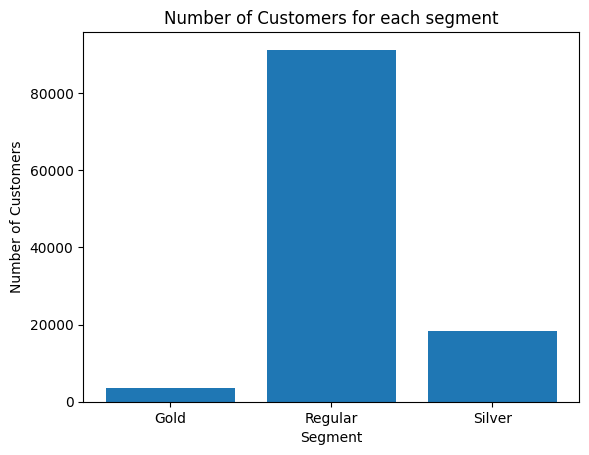

In [30]:
plt.bar(q2['segment'], q2['number_of_customers'])
plt.xlabel('Segment')
plt.ylabel('Number of Customers')
plt.title('Number of Customers for each segment')


3. Which provinces and cities are customers of each segment mainly concentrated in? Sort in order from largest to smallest the Regular, Silver, Gold columns

In [31]:
q3 = cus1.groupby(['province_city', 'segment'], as_index=False)['cust_id'].count().rename(columns={'cust_id': 'number_of_customers'})
q3

,province_city,segment,number_of_customers
0,AN GIANG,Gold,4
1,AN GIANG,Regular,863
2,AN GIANG,Silver,73
3,BAC GIANG,Gold,48
4,BAC GIANG,Regular,1066
...,...,...,...
111,VINH PHUC,Regular,737
112,VINH PHUC,Silver,112
113,VUNG TAU,Gold,7
114,VUNG TAU,Regular,237


In [32]:
q3 = q3.pivot_table(index='province_city', columns='segment', values='number_of_customers', aggfunc='sum')
q3.reset_index(inplace=True)
q3

segment,province_city,Gold,Regular,Silver
0,AN GIANG,4.0,863.0,73.0
1,BAC GIANG,48.0,1066.0,272.0
2,BAC NINH,18.0,341.0,81.0
3,BINH DINH,9.0,388.0,70.0
4,BINH DUONG,5.0,984.0,101.0
5,BINH THUAN,14.0,396.0,86.0
6,CA MAU,NaN,8.0,NaN
7,CAN THO,20.0,804.0,125.0
8,DA LAT,1.0,39.0,7.0
9,DA NANG,45.0,1626.0,327.0


Method 2: Pivot table from the beginning

In [33]:
q3 = cus1.pivot_table(index='province_city', columns='segment', values='cust_id', aggfunc='count')
q3.reset_index(inplace=True)
q3

segment,province_city,Gold,Regular,Silver
0,AN GIANG,4.0,863.0,73.0
1,BAC GIANG,48.0,1066.0,272.0
2,BAC NINH,18.0,341.0,81.0
3,BINH DINH,9.0,388.0,70.0
4,BINH DUONG,5.0,984.0,101.0
5,BINH THUAN,14.0,396.0,86.0
6,CA MAU,NaN,8.0,NaN
7,CAN THO,20.0,804.0,125.0
8,DA LAT,1.0,39.0,7.0
9,DA NANG,45.0,1626.0,327.0


In [34]:
# Use the reindex function to rearrange the order of columns
q3 = q3.reindex(columns=['province_city', 'Regular', 'Silver', 'Gold'])
q3

segment,province_city,Regular,Silver,Gold
0,AN GIANG,863.0,73.0,4.0
1,BAC GIANG,1066.0,272.0,48.0
2,BAC NINH,341.0,81.0,18.0
3,BINH DINH,388.0,70.0,9.0
4,BINH DUONG,984.0,101.0,5.0
5,BINH THUAN,396.0,86.0,14.0
6,CA MAU,8.0,NaN,NaN
7,CAN THO,804.0,125.0,20.0
8,DA LAT,39.0,7.0,1.0
9,DA NANG,1626.0,327.0,45.0


4. What is the customer AUM (Min, Q25, Q50, Q75, Q90, Max, Mean) across segments? (create table and draw box plot for 3 segments)

In [35]:
q4 = cus1.groupby('segment')['amount'].describe()
q4.reset_index(inplace=True)
q4

,segment,count,mean,std,min,25%,50%,75%,max
0,Gold,3632.0,1.589435e+09,5.480749e+09,0.0,8.411002e+07,5.587676e+08,1.335649e+09,1.325000e+11
1,Regular,91166.0,9.411988e+06,6.192274e+07,0.0,2.383338e+04,5.875266e+04,2.582428e+05,6.183456e+09
2,Silver,18268.0,4.230462e+07,8.936781e+07,0.0,8.664998e+04,1.894635e+06,2.640585e+07,1.250000e+09


In [36]:
# Find Q90
Q90 = cus1.groupby('segment', as_index=False)['amount'].quantile(0.9).rename(columns={'amount': 'Q90'})
Q90

,segment,Q90
0,Gold,2.981253e+09
1,Regular,4.537595e+06
2,Silver,1.684323e+08


In [37]:
# Method 1: Use assignment to create a new column in table q4
q4['Q90'] = Q90['Q90']
q4

,segment,count,mean,std,min,25%,50%,75%,max,Q90
0,Gold,3632.0,1.589435e+09,5.480749e+09,0.0,8.411002e+07,5.587676e+08,1.335649e+09,1.325000e+11,2.981253e+09
1,Regular,91166.0,9.411988e+06,6.192274e+07,0.0,2.383338e+04,5.875266e+04,2.582428e+05,6.183456e+09,4.537595e+06
2,Silver,18268.0,4.230462e+07,8.936781e+07,0.0,8.664998e+04,1.894635e+06,2.640585e+07,1.250000e+09,1.684323e+08


In [ ]:
# Method 2: Use the pd.concat function to concatenate columns
pd.concat([q4, Q90[['Q90']]], axis=1)

<Axes: xlabel='segment', ylabel='amount'>

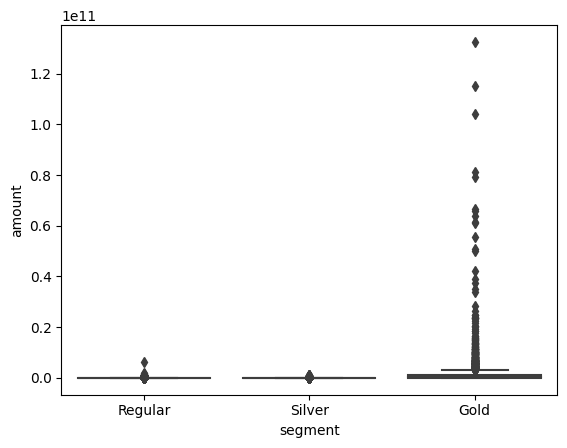

In [38]:
# Draw box plot
import seaborn as sns
sns.boxplot(x='segment', y='amount', data=cus1)

5. What is the Product Penetration Credit Card, Current Account, Term Deposit of Regular customers?

In [51]:
cus1

,cust_id,amount,segment,province_city,prod_ca,prod_td,prod_credit_card
0,999992,6.197167e+08,Regular,HAI DUONG,0,1,0
1,999994,5.312117e+07,Regular,HA NOI,1,1,0
2,1000017,0.000000e+00,Regular,HA NOI,1,0,0
3,1000018,6.678269e+04,Regular,HA NOI,1,0,0
4,1000021,7.766416e+07,Silver,HO CHI MINH,1,1,0
...,...,...,...,...,...,...,...
113061,4693215,4.184928e+04,Regular,DONG NAI,1,0,0
113062,4693217,5.250000e+02,Regular,DONG NAI,1,0,0
113063,4693229,5.916667e+01,Regular,HA NOI,1,0,0
113064,4701973,0.000000e+00,Regular,DA NANG,1,0,0


In [79]:
q5 = cus1[cus1['segment'] == 'Regular'].melt(id_vars=['cust_id'], value_vars=['prod_ca', 'prod_td', 'prod_credit_card']).rename(columns={'variable': 'Product'})
q5

,cust_id,Product,value
0,999992,prod_ca,0
1,999994,prod_ca,1
2,1000017,prod_ca,1
3,1000018,prod_ca,1
4,99995,prod_ca,1
...,...,...,...
273493,4693215,prod_credit_card,0
273494,4693217,prod_credit_card,0
273495,4693229,prod_credit_card,0
273496,4701973,prod_credit_card,0


In [80]:
q5 = q5.pivot_table(index=['Product'], columns=['value'], values='cust_id', aggfunc='count', fill_value=0).reset_index()
q5.columns = ['Product', 'No of customers using product', 'No of customers not using product ']
q5

,Product,No of customers using product,No of customers not using product
0,prod_ca,8508,82658
1,prod_credit_card,78911,12255
2,prod_td,83643,7523


In [83]:
q5['Product penetration rate'] = q5['No of customers using product'] * 100 / (q5['No of customers using product'] + q5['No of customers not using product '])
q5

,Product,No of customers using product,No of customers not using product,Product penetration rate
0,prod_ca,8508,82658,9.332427
1,prod_credit_card,78911,12255,86.557489
2,prod_td,83643,7523,91.748020


In [ ]:
# Another method
q5 = q5.groupby('Product', as_index=False).agg({'value': 'sum', 'cust_id': 'count'})
q5.rename(columns={'value': 'No of customers using product', 'cust_id': 'Number of customer'}, inplace=True)

In [ ]:
q5['No of customers not using product'] = q5['Number of customer'] - q5['No of customers using product']
q5['Product penetration rate'] = q5['No of customers using product'] * 100 / (q5['No of customers using product'] + q5['No of customers not using product'])
q5